<a href="https://colab.research.google.com/github/LarryDCJ/AC_Classifier/blob/master/Classifier_Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
%cd /content/drive/MyDrive/AC_Classifier

/content/drive/MyDrive/AC_Classifier


In [23]:
! git config --global user.email "larrydcj@icloud.com"
! git config --global user.name "LarryDCJ"

In [ ]:
! git pull https://github.com/LarryDCJ/AC_Classifier

In [ ]:
! git commit

In [1]:
%%capture
!pip install fastbook

In [2]:
import re
from fastai.data.all import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import pathlib
from IPython.display import Image
from google.colab import drive
import os
drive.mount('/content/drive')
config_file = Path("~/.fastai/config.yml").expanduser()

if config_file.exists(): os.remove(config_file)
assert not config_file.exists()
config = Config()
assert config_file.exists()
print(config.d)
config['archive_path'] = Path('drive/archive')
config['data_path'] = Path('drive/data')
config['model_path'] = Path('drive/models')
config['storage_path'] = Path('root/tmp')
config.save()
print(config.d)
print("Please continue")

Mounted at /content/drive
{'archive_path': '/root/.fastai/archive', 'data_path': '/root/.fastai/data', 'model_path': '/root/.fastai/models', 'storage_path': '/tmp', 'version': 2}
{'archive_path': 'drive/archive', 'data_path': 'drive/data', 'model_path': 'drive/models', 'storage_path': 'root/tmp', 'version': 2}
Please continue


In [29]:
path = Path('/content/drive/MyDrive/AC_Classifier/')
print(type(path))
path.ls()
files = get_image_files(path/"images")
def label_func(f): return f[0].isupper()
print(len(files))
print(type(files))

<class 'pathlib.PosixPath'>
5650
<class 'fastcore.foundation.L'>


In [30]:
print(files[0].name)
#def label_func(f): return re.sub("_[^_]+$", "",f) #rename folder based on filename
pat = r'^(.*)_\d+.jpg' #Image Categories from filename

A-10_02.jpg


In [31]:
dls = ImageDataLoaders.from_name_re(path,
                                    files,
                                    pat,
                                    item_tfms=RandomResizedCrop(224, min_scale=0.5),
                                    batch_tfms=aug_transforms())

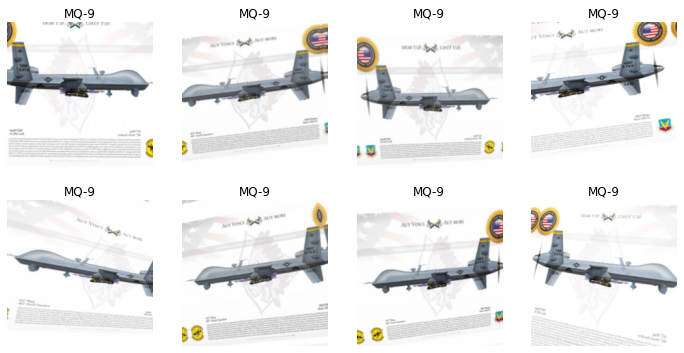

In [32]:
dls.train.show_batch(max_n=8,nrows=2, unique=True)

In [33]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,3.258704,2.295944,0.622124,01:04


epoch,train_loss,valid_loss,error_rate,time
0,1.792231,1.637187,0.476991,01:06
1,1.269096,1.252793,0.361947,01:04
2,0.865284,1.104272,0.342478,01:06
3,0.626355,1.051308,0.323894,01:08


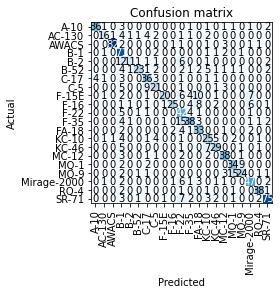

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

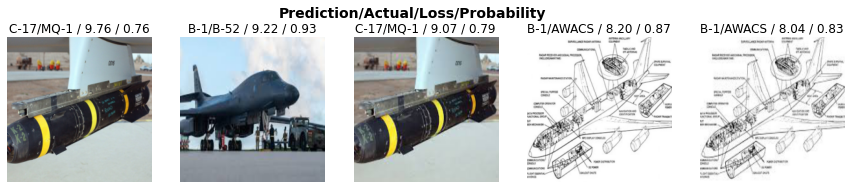

In [35]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
CLEAN THE DATA HERE

SuggestedLRs(lr_min=1.58489319801447e-07, lr_steep=3.311311274956097e-06)

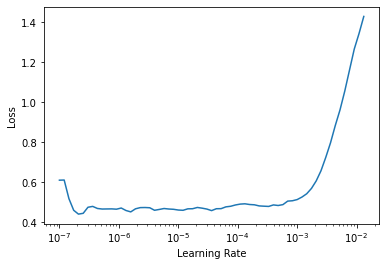

In [36]:
learn.lr_find()

In [ ]:
learn.fine_tune(2, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.294198,1.009054,0.301759,01:04


epoch,train_loss,valid_loss,error_rate,time
0,0.509148,1.119417,0.313261,01:07
1,0.325311,0.868610,0.263870,01:06
